# Regresión

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

## statsmodels

Esta librería nos brinda un gran número de herramientas para explorar datos, estimar modelos estadísticos, realizar pruebas estadísticas y muchas cosas más.

https://statsmodels.sourceforge.net/

## Regresiones

Las regresiones es una de las herramientas principales de la estadistica inferencial. El objetivo del análisis de regresión es describir la relación entre un conjunto de variables, llamadas variables dependientes, y otro conjunto de variables, llamadas variables independientes o explicativas. 

Más específicamente, el análisis de regresión ayuda a entender cómo el valor típico de la variable dependiente cambia cuando cualquiera de las variables independientes es cambiada, mientras que se mantienen las otras variables independientes fijas. 

El producto final del análisis de regresión es la estimación de una función de las variables independientes llamada la función de regresión. 

**La idea es que en base a esta función de regresión podamos hacer estimaciones sobre eventos futuros.**

La regresión lineal es una de las técnicas más simples y mayormente utilizadas en los análisis de regresiones. Hace suposiciones muy rígidas sobre la relación entre la variable dependiente 
 y variable independiente 
. Asume que la relación va a tomar la forma:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <msub>
    <mi>&#x3B2;</mi>
    <mn>0</mn>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>&#x3B2;</mi>
    <mn>1</mn>
  </msub>
  <mo>&#x2217;</mo>
  <mi>x</mi>
</math>

Uno de los métodos más populares para realizar regresiones lineales es el de mínimos cuadrados ordinarios (OLS, por sus siglas en inglés), este método es el estimador más simple y común en la que los dos 
s se eligen para minimizar el cuadrado de la distancia entre los valores estimados y los valores reales.

Realizar análisis de regresiones en Python es sumamente fácil gracias a **statsmodels**.

Veamos un pequeño ejemplo utilizando el dataset longley, el cual es ideal para realizar regresiones:

In [2]:
# importanto la api de statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Creando un DataFrame de pandas.
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head() # longley dataset

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [3]:
# utilizando la api de formula de statsmodels
est = smf.ols(formula='Employed ~ GNP', data=df).fit()
est.summary() # Employed se estima en base a GNP.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           8.36e-12
Time:                        10:09:29   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como podemos ver, el resumen que nos brinda statsmodels sobre nuestro modelo de regresión contiene bastante información sobre como se ajuste el modelo a los datos. 

Significado de valores:

- Dep. Variable: es la variable que estamos estimando.
- Model: es el modelo que estamos utilizando.
- R-squared: es el coeficiente de determinación, el cual mide cuan bien nuestra recta de regresion se aproxima a los datos reales.
- Adj. R-squared: es el coeficiente anterior ajustado según el número de observaciones.
- [95.0% Conf. Int.]: Los valores inferior y superior del intervalo de confianza del 95%.
- coef: el valor estimado del coeficiente.
- std err: el error estándar de la estimación del coeficiente.
- Skew: una medida de la asimetria de los datos sobre la media.
- Kurtosis: Una medida de la forma de la distribución. La curtosis compara la cantidad de datos cerca de la media con los que están más lejos de la media(en las colas).

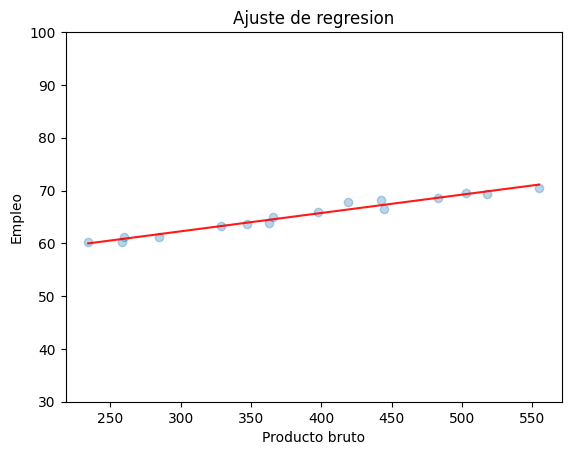

In [4]:
# grafico de regresion. que tanto se ajusta el modelo a los datos.
y = df.Employed  # Respuesta
X = df.GNP  # Predictor
X = sm.add_constant(X) # agrega constante

X_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)})
X_1 = sm.add_constant(X_1)

y_reg = est.predict(X_1) # estimacion

plt.scatter(X.GNP, y, alpha=0.3)  # grafica los puntos de datos
plt.ylim(30, 100)  # limite de eje y
plt.xlabel("Producto bruto") # leyenda eje x
plt.ylabel("Empleo") # leyenda eje y
plt.title("Ajuste de regresion") # titulo del grafico
reg = plt.plot(X_1.GNP, y_reg, 'r', alpha=0.9)  # linea de regresion

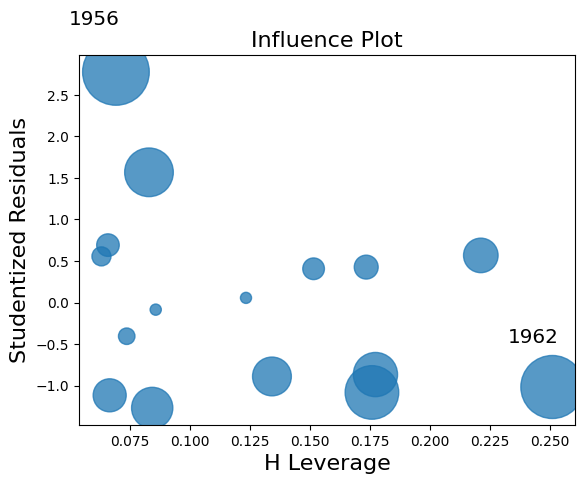

In [5]:
# grafico de influencia
# https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.influence_plot.html

from statsmodels.graphics.regressionplots import influence_plot

inf =influence_plot(est)

Este último gráfico nos muestra el apalancamiento y la influencia de cada caso.

**Un gráfico de influencia muestra la excesión, el apalancamiento y la influencia de cada caso.**

El gráfico muestra el residuo en el eje vertical, el apalancamiento en el eje horizontal, y el tamaño del punto es la raíz cuadrada de la estadística D de Cook, una medida de la influencia del punto.

- Los valores atípicos son casos que no corresponden al modelo instalado en la mayor parte de los datos.
    - Se pueden identificar valores atípicos ya que esos casos con un gran residuo (generalmente mayor que aproximadamente +/- 2), aunque no todos los casos con un gran residuo son atípicos y no todos los atípicos son malos.
    - Algunos de los casos más interesantes pueden ser atípicos.

- El apalancamiento es el potencial para que un caso influya en el modelo.
    - Se puede identificar puntos con alto apalancamiento como los más alejados a la derecha.
    - Un punto con alto apalancamiento puede no tener mucha influencia en el modelo si se ajusta al modelo general sin ese caso.

- La influencia combina el apalancamiento y el residuo de un caso para medir cómo cambiarían las estimaciones de los parámetros si se excluyera ese caso.
    - Los puntos con una gran influencia residual y alto apalancamiento tienen la mayor influencia.
    - Se puede tener un efecto adverso en el modelo (perturbar) si se cambian o son excluidos, lo que hace que el modelo sea menos robusto.
    - A veces, un pequeño grupo de puntos influyentes puede tener un impacto excesivamente grande en el ajuste del modelo.